# Visualizaciones

En este notebook se visualizan las características obtenidas para ver si existe información relevante para realizar la estimación.

In [1]:
# carga de paquetes
import sys
sys.path.append("../../scripts/")
from funciones_paralectura import carga_de_datos, transformar_datos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


In [2]:
# carga de caminata aleatoria
documento = '../../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW5.mat'
documento_2 = '../../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW4.mat'
comentarios = ['discharge (random walk)',
               'rest (random walk)',
               'rest post random walk discharge']
comentario_final = ['charge (after random walk discharge)']
t, v, c, temp, T = carga_de_datos(documento, comentarios, comentario_final, nofinal=False)
t_2, v_2, c_2, temp_2, T_2 = carga_de_datos(documento_2, comentarios, comentario_final, nofinal=False)

carga de datos de bateria RW5.mat
tiempo len: 743
voltage len: 743
current len: 743
temperatura len: 743
Tiempo absoluto len: 743
carga de datos de bateria RW4.mat
tiempo len: 728
voltage len: 728
current len: 728
temperatura len: 728
Tiempo absoluto len: 728


In [3]:
[arr_dif_salto_c,
 arr_pot_salto,
 arr_centro_salto_c,
 arr_ciclo_salto,
 arr_voltaje_salto,
 arr_corriente_salto,
 arr_tiempo_salto,
 arr_temperatura_salto] = transformar_datos(t, v, c, temp, T)


saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}

df = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])

df['voltaje'] = [x for x in arr_voltaje_salto]
df['corriente'] = [x for x in arr_corriente_salto]
df['temperatura'] = [x for x in arr_temperatura_salto]
df['tiempo'] = [x for x in arr_tiempo_salto]
df['temp_ini'] = [x[0] for x in df['temperatura']]

df = df.reset_index()
print(len(df))
df.head()


ciclo 741     4931


,index,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini
0,0,1,0.614047,4.005,2.0025,"[4.199, 4.199, 3.833, 3.809, 3.801, 3.795, 3.7...","[0.0, 0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0,...","[20.61039, 20.61039, 20.61039, 20.62594, 20.62...","[274884.25, 274884.5, 274884.54, 274885.540000...",20.61039
1,1,1,4266.690109,2.007,1.0035,"[3.512, 3.817, 3.842, 3.683, 3.688, 3.693, 3.6...","[4.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.18093, 28.18093, 28.21...","[275184.5, 275184.50999999995, 275184.7, 27518...",28.18093
2,2,1,6510.697143,1.503,0.7515,"[3.72, 3.868, 3.879, 3.763, 3.762, 3.763, 3.76...","[2.0, 0.0, 0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.5...","[28.36748, 28.36748, 28.36748, 28.36748, 28.35...","[275484.7, 275484.71, 275485.35, 275485.39, 27...",28.36748
3,3,1,8200.072656,2.504,1.2520,"[3.733, 3.846, 3.854, 3.657, 3.652, 3.65, 3.64...","[1.5, 0.0, 0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2...","[27.24822, 27.24822, 27.23267, 27.23267, 27.23...","[275785.35, 275785.36, 275785.81, 275785.85, 2...",27.24822
4,4,1,10884.859898,0.504,0.2520,"[3.543, 3.731, 3.747, 3.708, 3.711, 3.715, 3.7...","[2.5, 0.0, 0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.07...","[276085.81, 276085.82, 276086.28, 276086.33, 2...",28.07212


In [4]:
# extraccion de caracteristicas
from preparacion_entrenamiento import *
from extraccion_caracteristicas import *

In [5]:
# obtener features

#RW3
df["ene_total"] = energia_total(df["energia"],df["ciclo"])

mag = Mg_rel(df['magnitud'])
df["Mag_rel"] = mag[0] #magnitud relativa a la anterior
df["Mediana_rel"] = mag[1] #mediana relativa
df["Mag_rel_abs"] = np.absolute(mag[0]) #magnitud relativa a la anterior
df["Mediana_rel_abs"] = np.absolute(mag[1]) #mediana relativa

df["F1"] = primera_derivada(df["voltaje"],df["tiempo"])
df["F2"] = segunda_derivada(df["voltaje"],df["tiempo"]) 
df["F3"] = deltaT(df["temp_ini"],df["magnitud"])  #Diferencia de temperatura
df["F4"] = primera_derivada_RC(df["voltaje"])  # primera derivada efecto capacitivo
df["F5"] = segunda_derivada_RC(df["voltaje"])  # segunda derivada efecto capacitivo
RC_test = RC(df["voltaje"],df["tiempo"],df["ciclo"])
df["F6"] = RC_test[0]  # circuito RC
df["F7"] = potencia_instantanea_salto(df['voltaje'], df['corriente'], limite=1) #Potencia instantanea
df["F8"] = np.round(df["F7"].values/df["Mag_rel"].values,3)
df["F9"] =  np.round(df["F7"].values/df["Mag_rel_abs"].values,3)
df['F10'] = diferencia_voltaje(df['voltaje'], df['corriente'])
df['F11'] = diferencia_voltaje2(df['voltaje'], df['corriente'])

df = df.replace([np.inf, -np.inf], np.nan).dropna()



/home/martin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/martin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


In [6]:
df.columns

Index(['index', 'ciclo', 'energia', 'magnitud', 'media', 'voltaje',
       'corriente', 'temperatura', 'tiempo', 'temp_ini', 'ene_total',
       'Mag_rel', 'Mediana_rel', 'Mag_rel_abs', 'Mediana_rel_abs', 'F1', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11'],
      dtype='object')

index


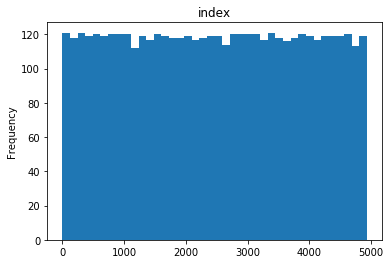

ciclo


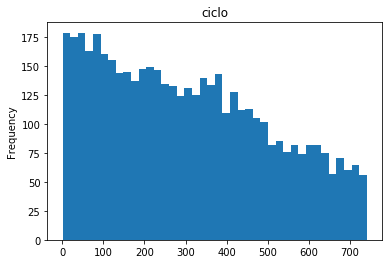

energia


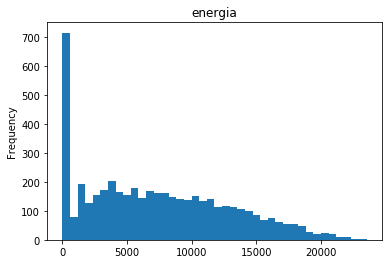

magnitud


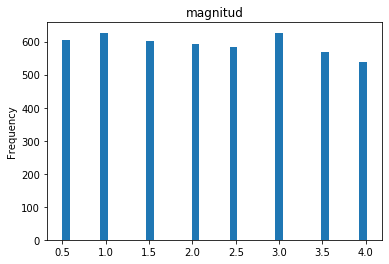

media


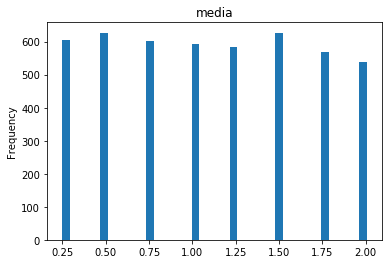

voltaje
corriente
temperatura
tiempo
temp_ini


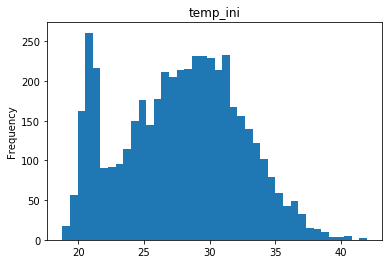

ene_total


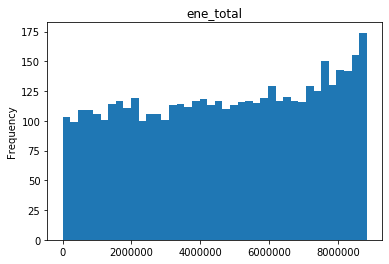

Mag_rel


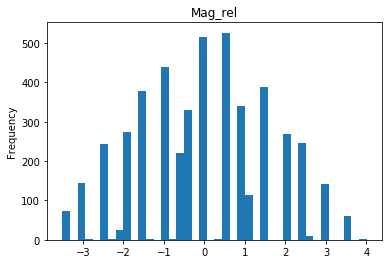

Mediana_rel


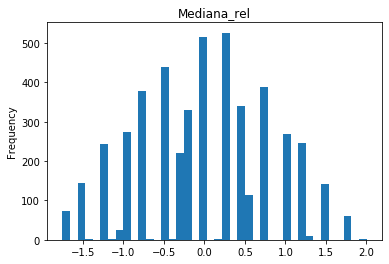

Mag_rel_abs


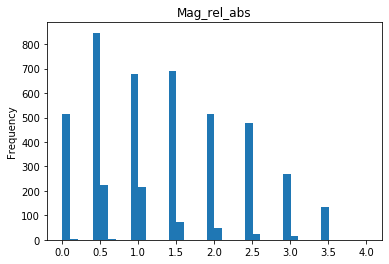

Mediana_rel_abs


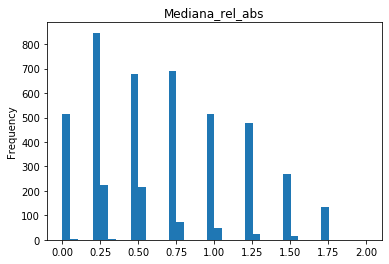

F1


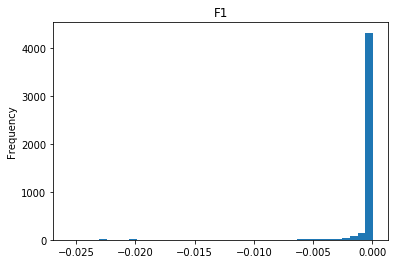

F2


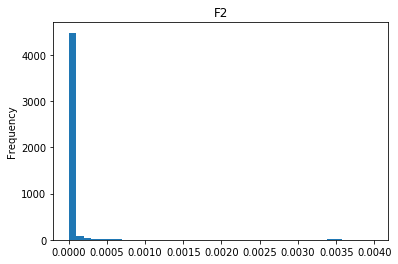

F3


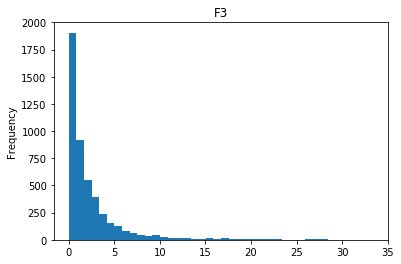

F4


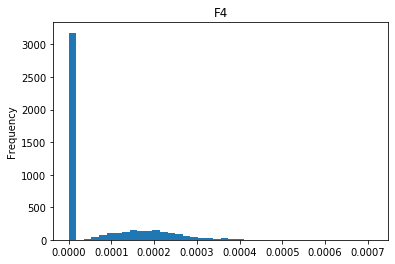

F5


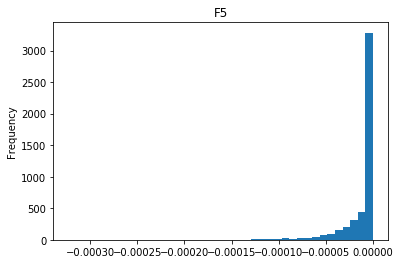

F6


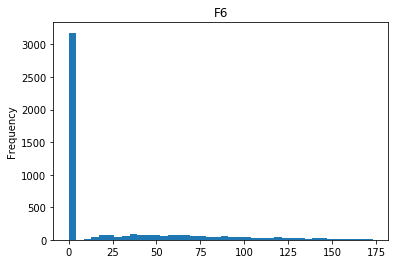

F7


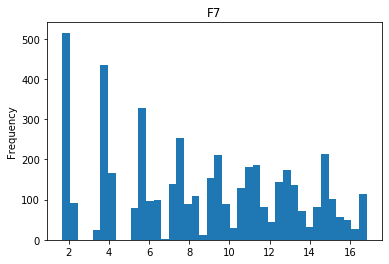

F8


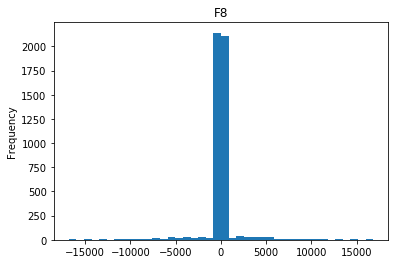

F9


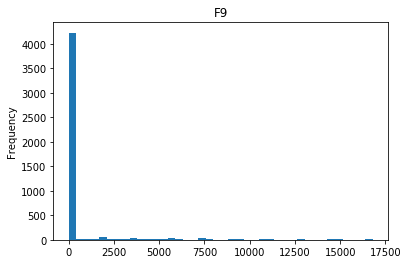

F10


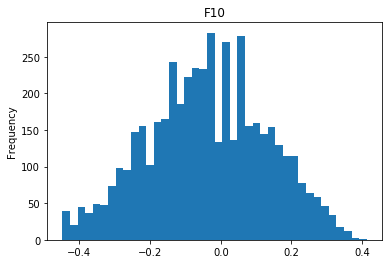

F11


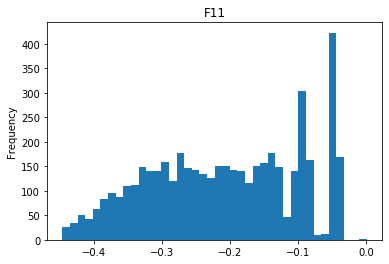

In [7]:
for col in df.columns:
    print(col)
    try:
        df[col].plot.hist(bins=40), plt.title(col), plt.show()
    except:
        pass

index


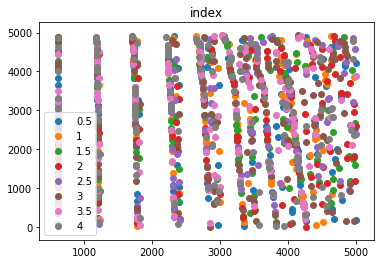

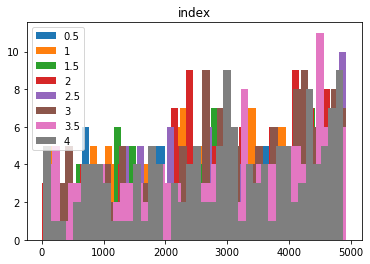

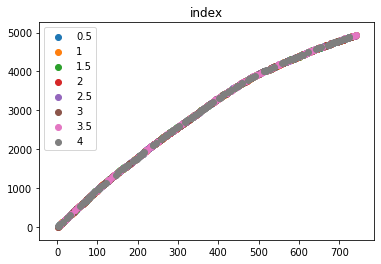

ciclo


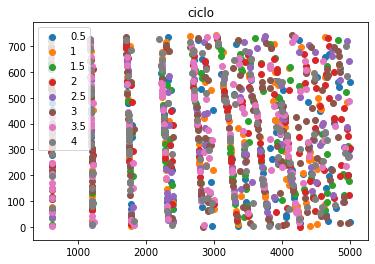

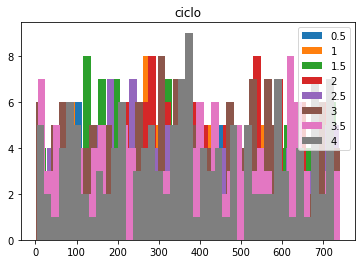

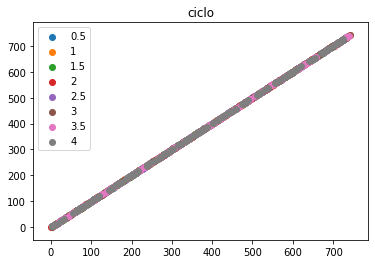

energia


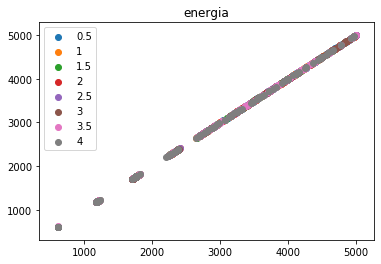

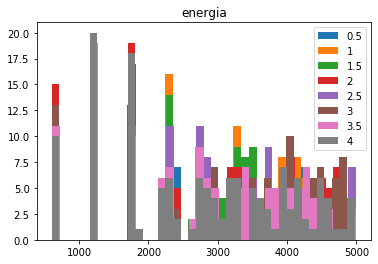

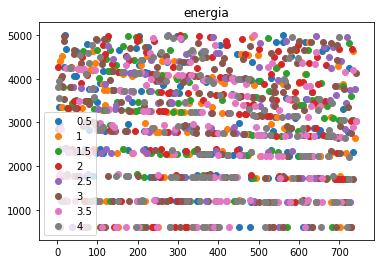

magnitud


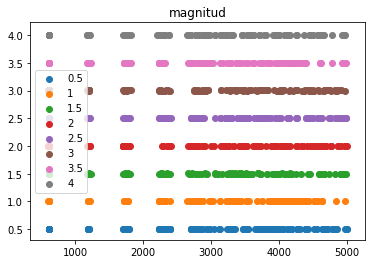

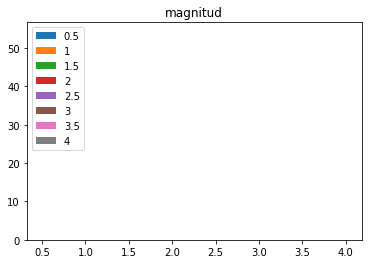

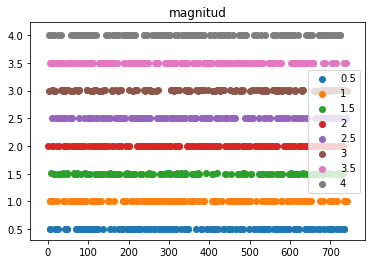

media


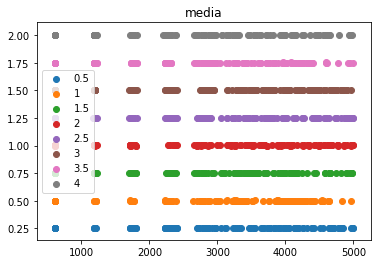

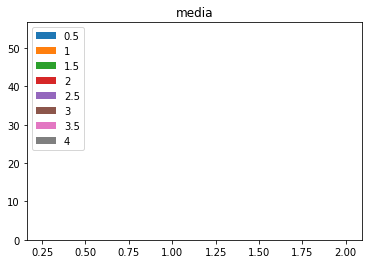

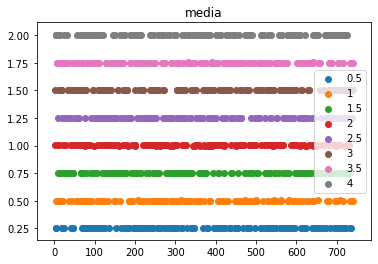

tiempo
temp_ini


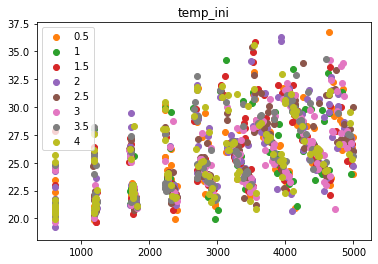

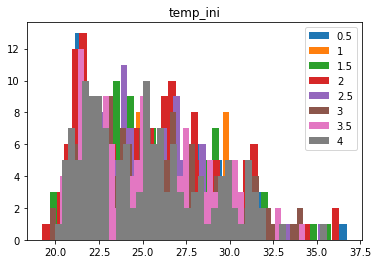

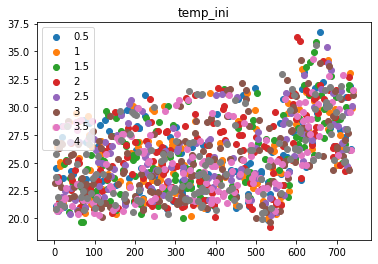

ene_total


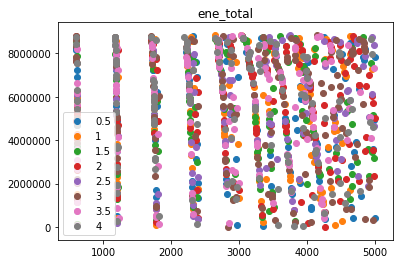

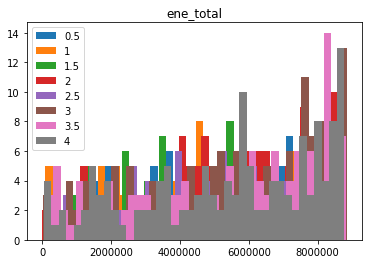

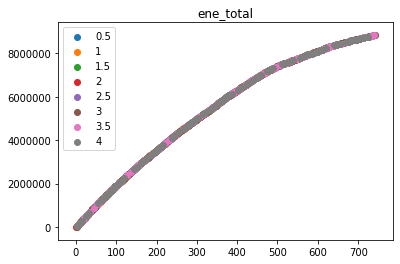

Mag_rel


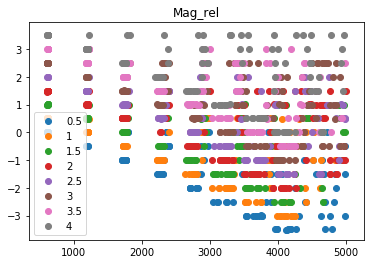

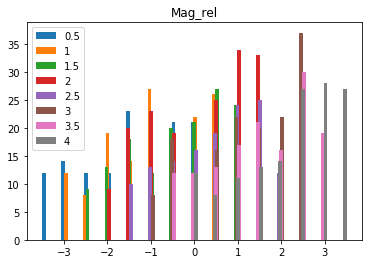

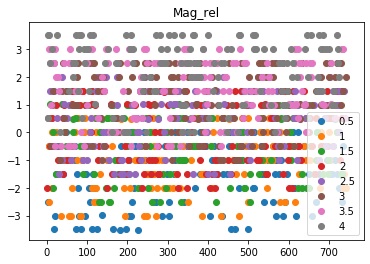

Mediana_rel


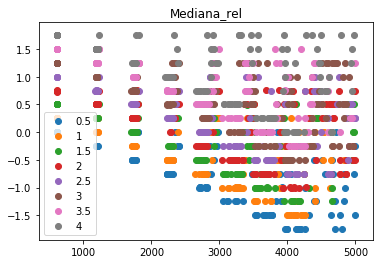

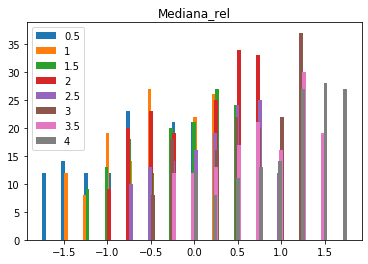

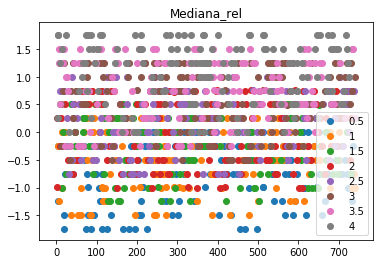

Mag_rel_abs


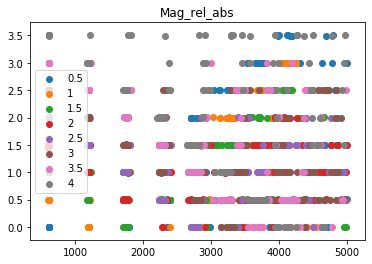

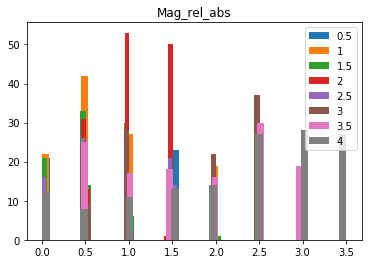

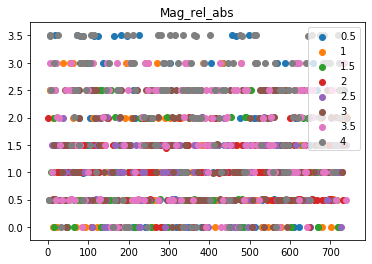

Mediana_rel_abs


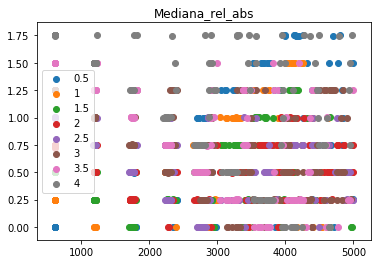

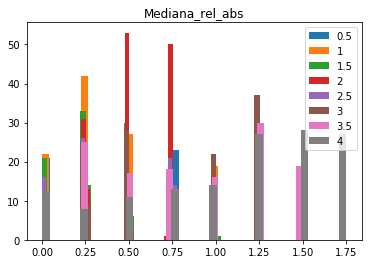

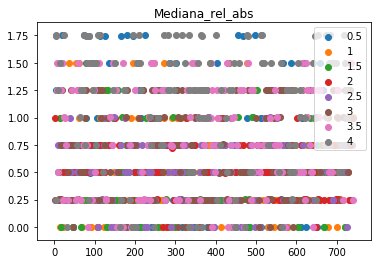

F1


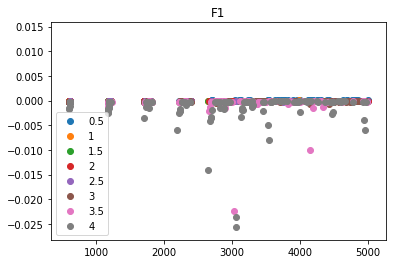

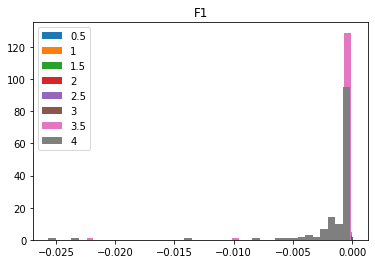

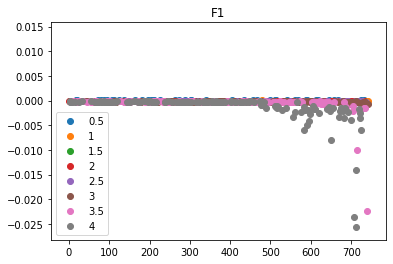

F2


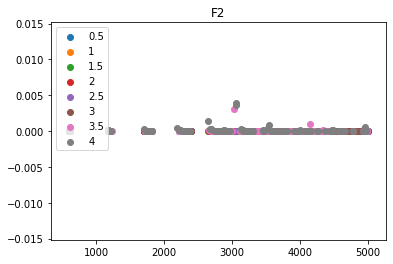

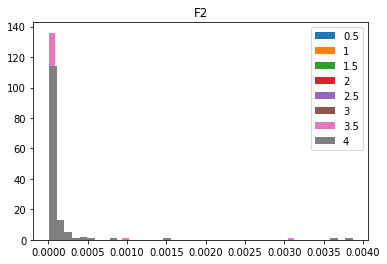

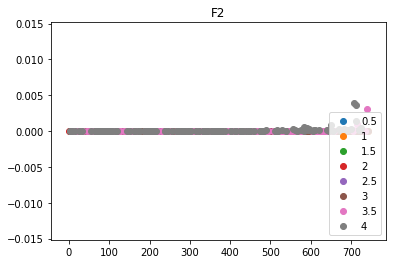

F3


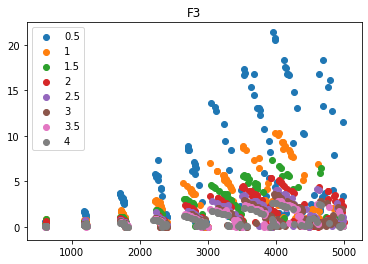

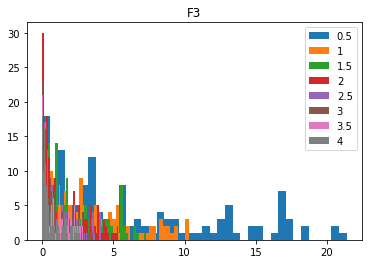

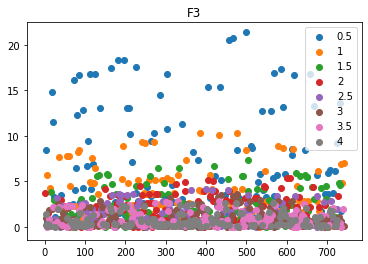

F4


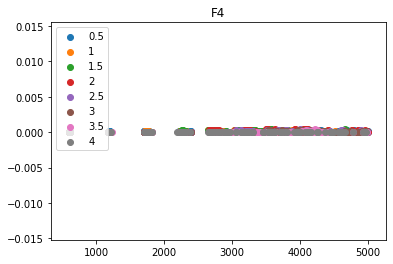

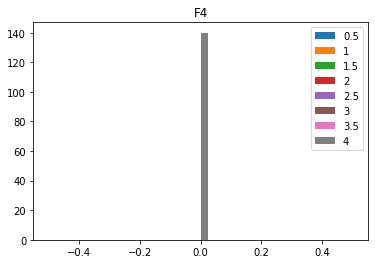

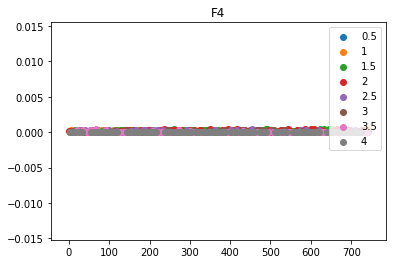

F5


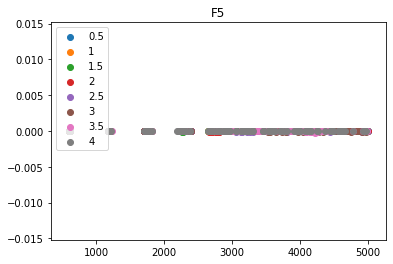

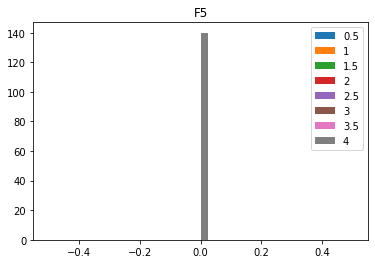

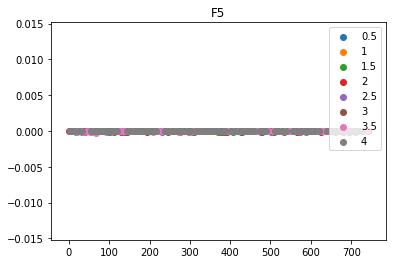

F6


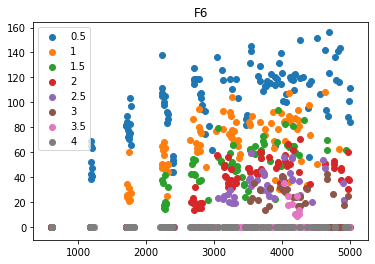

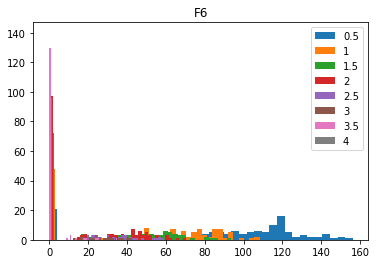

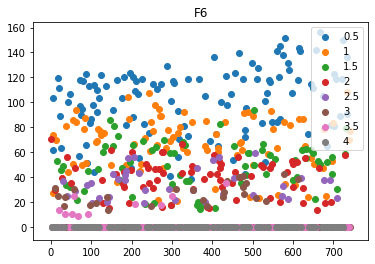

F7


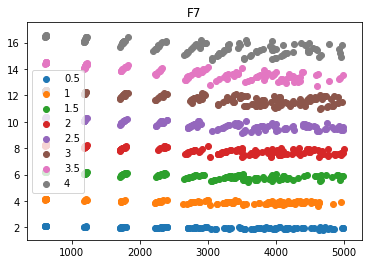

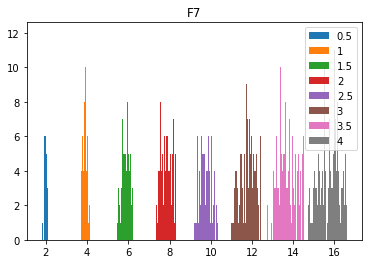

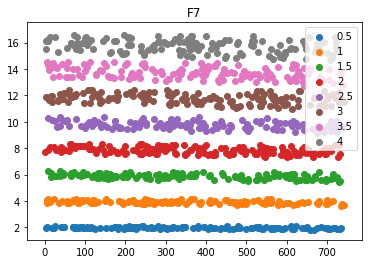

F8


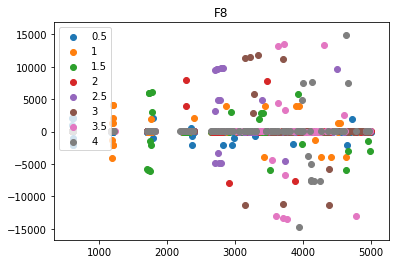

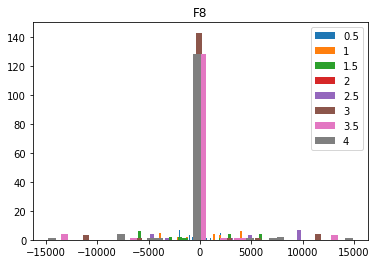

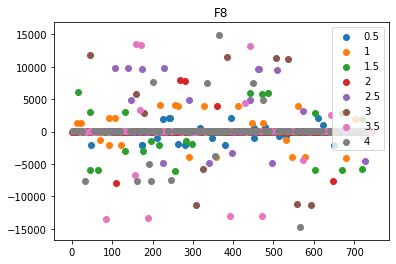

F9


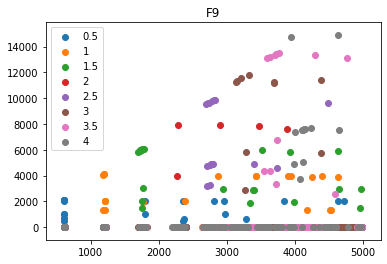

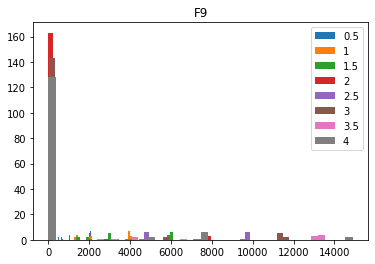

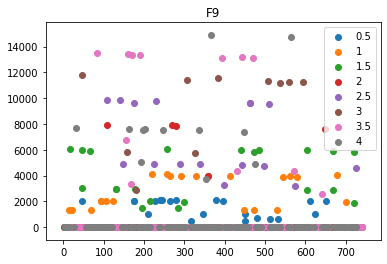

F10


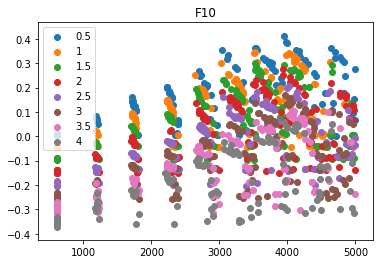

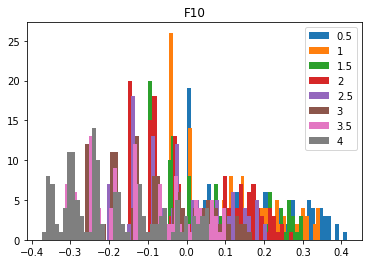

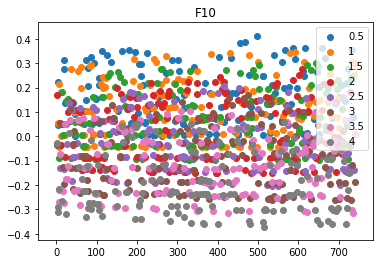

F11


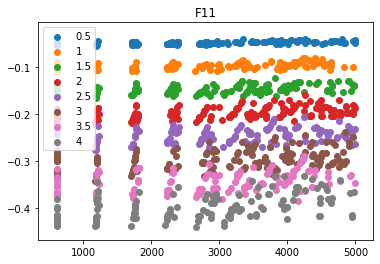

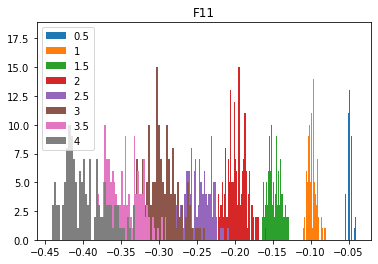

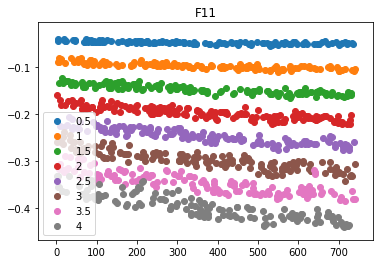

In [8]:
df = df.drop(columns=['voltaje', 'corriente', 'temperatura'])
df = df.iloc[np.where((df['energia'] < 5000) & (df['energia'] > 100))]

for col in df.columns:
    print(col)
    try:
        for i in [0.5, 1, 1.5, 2, 2.5, 3, 3.5 , 4]:
            cota = np.where((df['magnitud'] < i + 0.1) & (df['magnitud'] > i - 0.1))
            plt.scatter(df['energia'].iloc[cota], df[col].iloc[cota], label=i), plt.title(col)
        plt.legend()
        plt.show()
        
        for i in [0.5, 1, 1.5, 2, 2.5, 3, 3.5 , 4]:
            cota = np.where((df['magnitud'] < i + 0.1) & (df['magnitud'] > i - 0.1))
            plt.hist(df[col].iloc[cota], bins=40, label=i), plt.title(col)
        plt.legend()
        plt.show()
        
        for i in [0.5, 1, 1.5, 2, 2.5, 3, 3.5 , 4]:
            cota = np.where((df['magnitud'] < i + 0.1) & (df['magnitud'] > i - 0.1))
            plt.scatter(df['ciclo'].iloc[cota], df[col].iloc[cota], label=i), plt.title(col)
        plt.legend()
        plt.show()
    except:
        pass

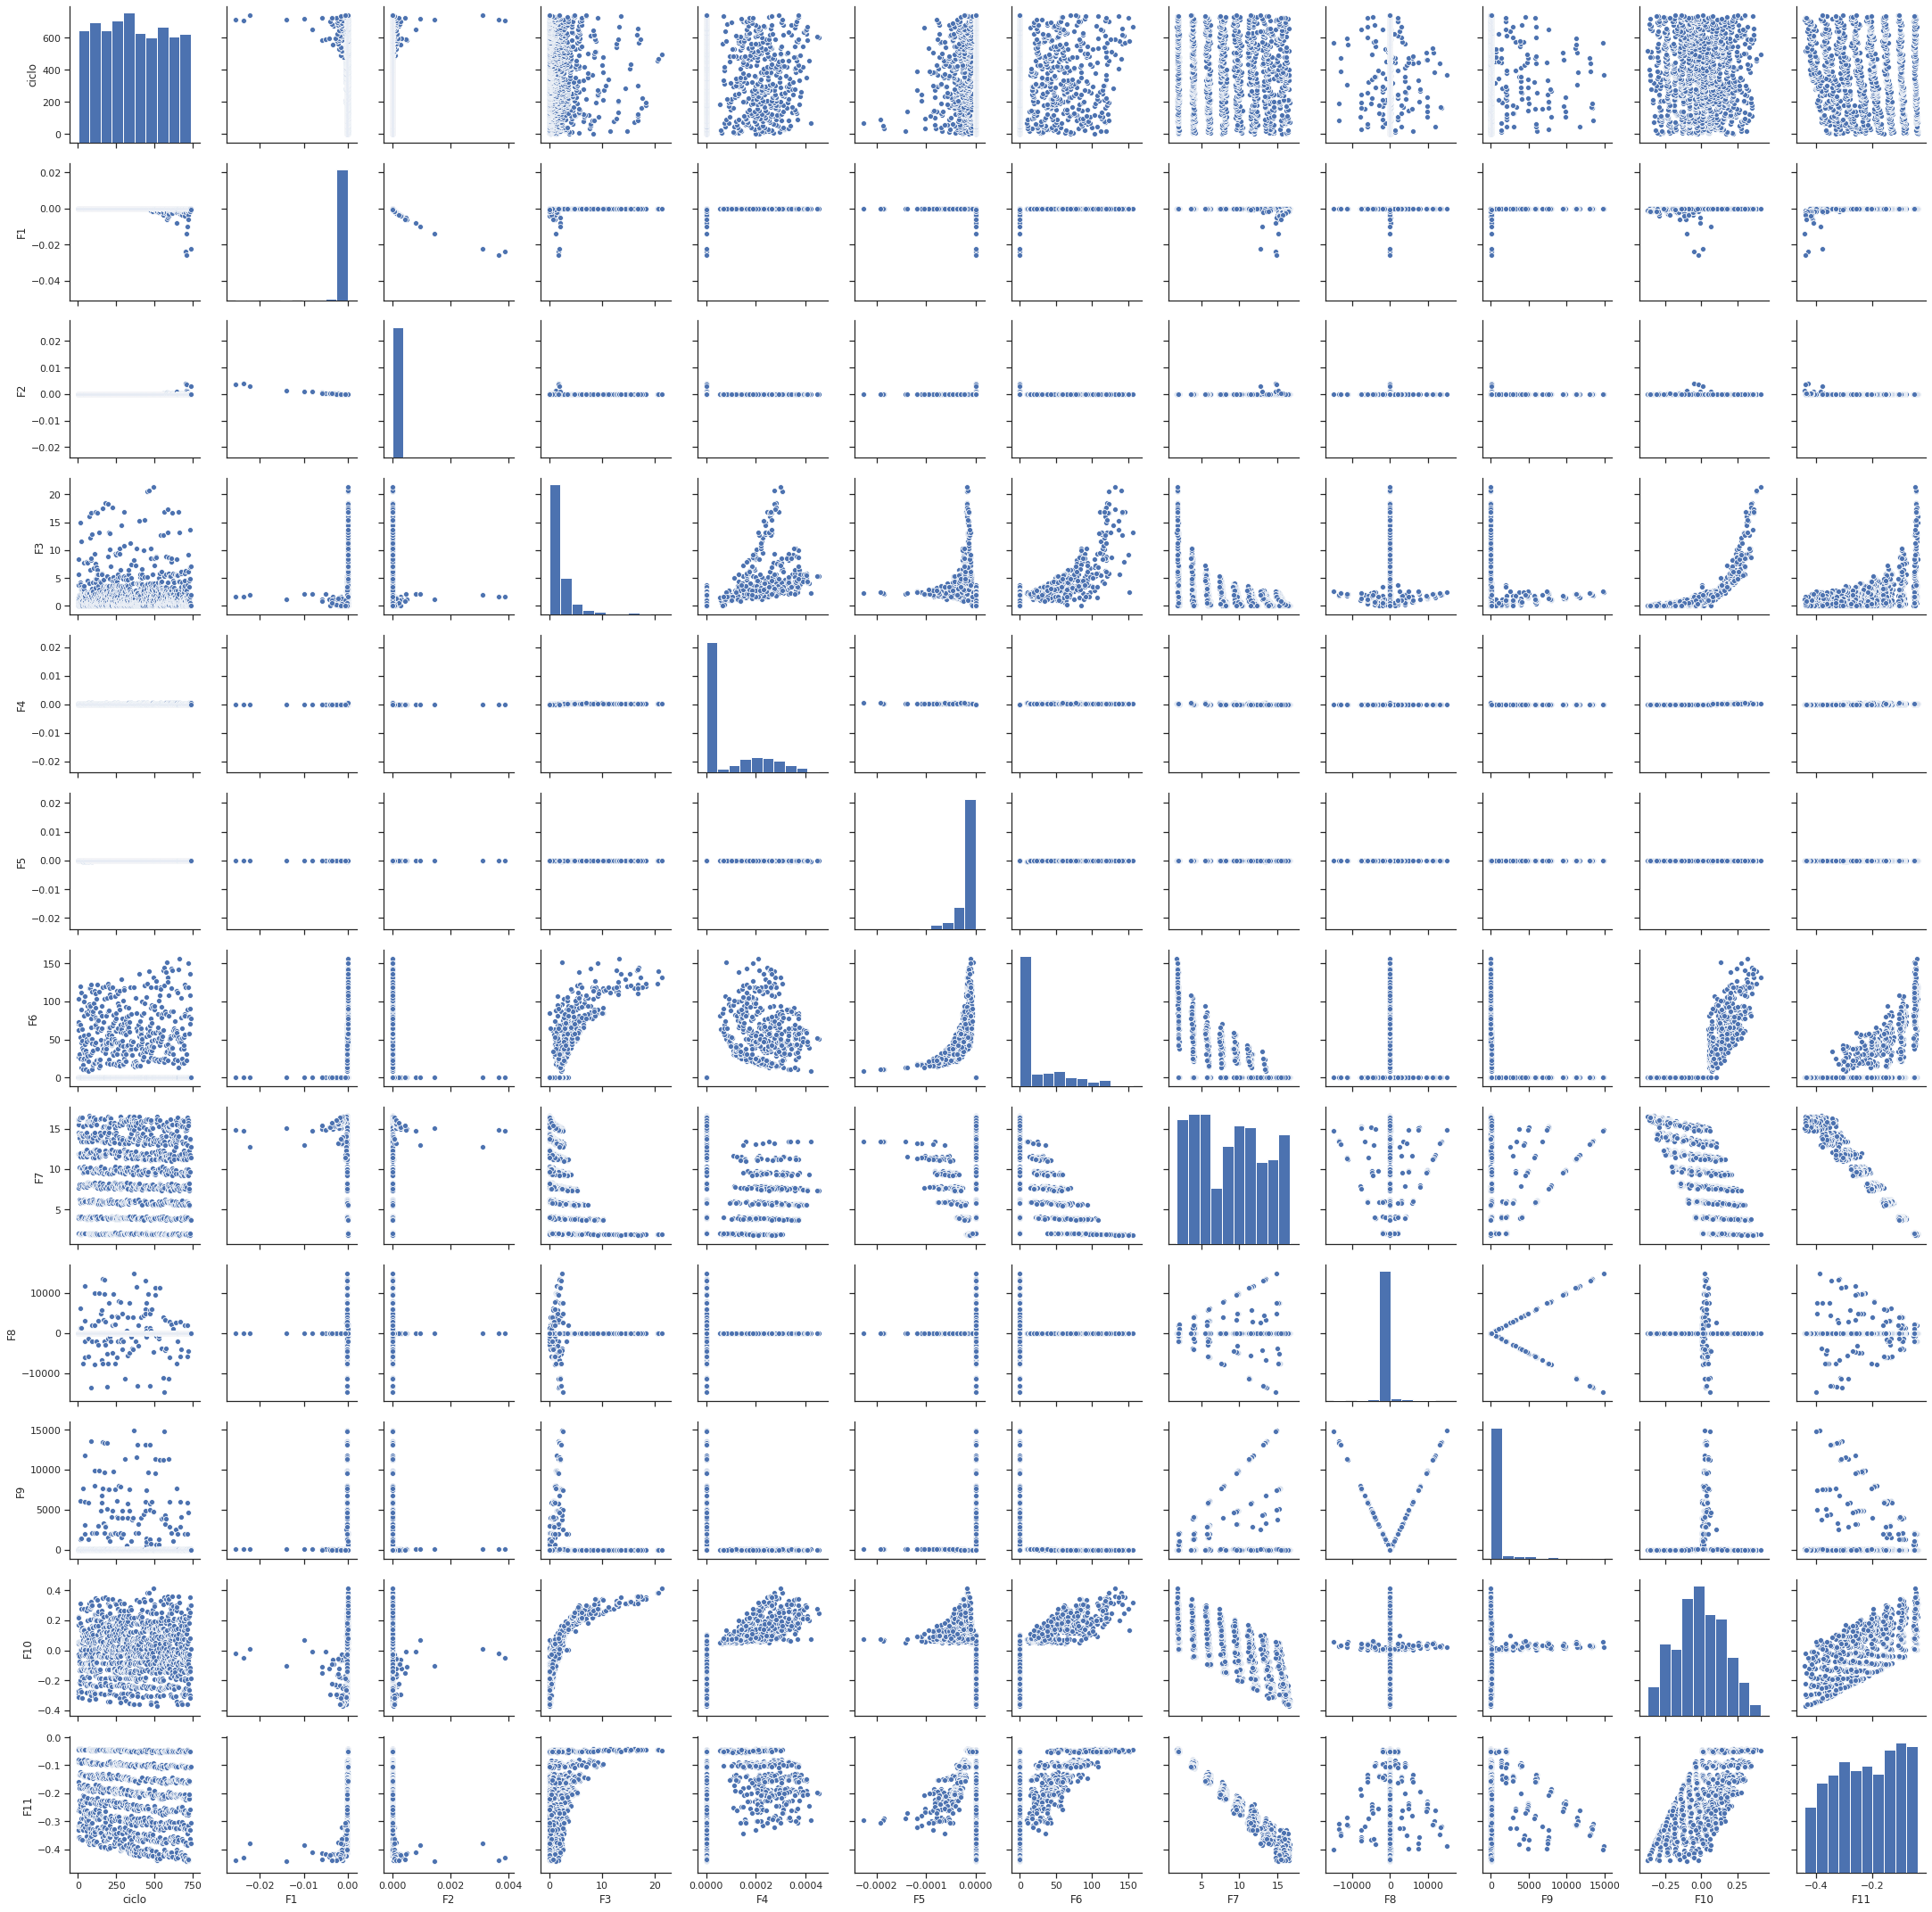

In [9]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

df_aux = df.drop(columns=['index', 'energia', 'magnitud',
                          'media', 'tiempo', 'temp_ini',
                          'ene_total', 'Mag_rel', 'Mediana_rel',
                          'Mag_rel_abs', 'Mediana_rel_abs'])

g = sns.pairplot(df_aux)

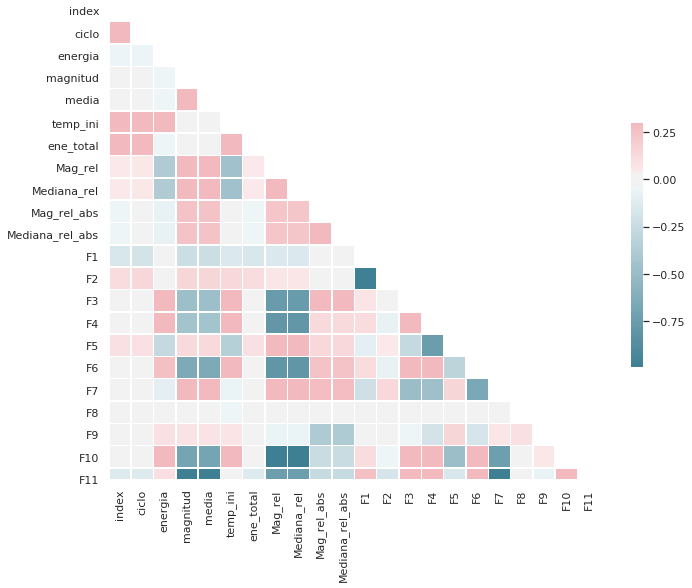

In [10]:

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})